# Load the dataset and first insight of dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
# import dataset
df = pd.read_csv("__ 002 Project-2-Cars-Dataset.csv")

In [3]:
# check df
df.head(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    float64
 10  MPG_City     428 non-null    float64
 11  MPG_Highway  428 non-null    float64
 12  Weight       428 non-null    float64
 13  Wheelbase    428 non-null    float64
 14  Length       428 non-null    float64
dtypes: float64(8), object(7)
memory usage: 50.8+ KB


In [5]:
df.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [6]:
df.nunique()

Make            38
Model          425
Type             6
Origin           3
DriveTrain       3
MSRP           410
Invoice        425
EngineSize      43
Cylinders        7
Horsepower     110
MPG_City        28
MPG_Highway     33
Weight         348
Wheelbase       40
Length          67
dtype: int64

# Cleaning Data

In [7]:
df.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

## Correct format of 'MSRP' & 'Invoice' column & correct column name & change dtype to int 

In [8]:
def get_number(row):
    if isinstance(row, str):
        return (row.replace('$', '').replace(',', ''))
    else:
        return np.nan

In [9]:
df['MSRP'] = df['MSRP'].apply(get_number)

In [10]:
df['Invoice'] = df['Invoice'].apply(get_number)

In [11]:
# correct datatype
df['MSRP'] = pd.to_numeric(df['MSRP'], errors='ignore')
df['Invoice'] = pd.to_numeric(df['Invoice'], errors = 'ignore')

In [12]:
df.rename(columns={'MSRP' : 'MSRP_USD', 'Invoice' : 'Invoice_USD'}, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP_USD     428 non-null    float64
 6   Invoice_USD  428 non-null    float64
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    float64
 10  MPG_City     428 non-null    float64
 11  MPG_Highway  428 non-null    float64
 12  Weight       428 non-null    float64
 13  Wheelbase    428 non-null    float64
 14  Length       428 non-null    float64
dtypes: float64(10), object(5)
memory usage: 50.8+ KB


## Fill missing values of numeric features

In [14]:
# this function will receive a column as parameter then it will apply Imputer on that specific column
def impute_column(cols):
    for col in cols:
        imputer = SimpleImputer(strategy='mean')
        df[col] = imputer.fit_transform(df[col])

In [15]:
impute_column([['Cylinders']])

In [16]:
impute_column([['MSRP_USD',
       'Invoice_USD', 'EngineSize', 'Horsepower', 'MPG_City',
       'MPG_Highway', 'Weight', 'Wheelbase', 'Length']])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP_USD     432 non-null    float64
 6   Invoice_USD  432 non-null    float64
 7   EngineSize   432 non-null    float64
 8   Cylinders    432 non-null    float64
 9   Horsepower   432 non-null    float64
 10  MPG_City     432 non-null    float64
 11  MPG_Highway  432 non-null    float64
 12  Weight       432 non-null    float64
 13  Wheelbase    432 non-null    float64
 14  Length       432 non-null    float64
dtypes: float64(10), object(5)
memory usage: 50.8+ KB


## Fill missing values of categorical features

In [18]:
df[df['Make'].isnull()]

,Make,Model,Type,Origin,DriveTrain,MSRP_USD,Invoice_USD,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
30,NaN,NaN,NaN,NaN,NaN,32774.85514,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.36215
39,NaN,NaN,NaN,NaN,NaN,32774.85514,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.36215
161,NaN,NaN,NaN,NaN,NaN,32774.85514,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.36215
173,NaN,NaN,NaN,NaN,NaN,32774.85514,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.36215


In [19]:
# using mode to fill missing values of categorical features
categorical_columns = ['Make', 'Model', 'Type', 'Origin', 'DriveTrain']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         432 non-null    object 
 1   Model        432 non-null    object 
 2   Type         432 non-null    object 
 3   Origin       432 non-null    object 
 4   DriveTrain   432 non-null    object 
 5   MSRP_USD     432 non-null    float64
 6   Invoice_USD  432 non-null    float64
 7   EngineSize   432 non-null    float64
 8   Cylinders    432 non-null    float64
 9   Horsepower   432 non-null    float64
 10  MPG_City     432 non-null    float64
 11  MPG_Highway  432 non-null    float64
 12  Weight       432 non-null    float64
 13  Wheelbase    432 non-null    float64
 14  Length       432 non-null    float64
dtypes: float64(10), object(5)
memory usage: 50.8+ KB


# Check Dataset

## Check differnt type of 'Make' Column and their frequencies

In [21]:
df['Make'].value_counts()

Make
Toyota           32
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Nissan           17
Honda            17
Chrysler         15
Volkswagen       15
Mitsubishi       13
Dodge            13
Hyundai          12
Jaguar           12
Volvo            12
Kia              11
Mazda            11
Lexus            11
Pontiac          11
Subaru           11
Lincoln           9
Mercury           9
Buick             9
Saturn            8
Infiniti          8
GMC               8
Cadillac          8
Suzuki            8
Porsche           7
Saab              7
Acura             7
Oldsmobile        3
Jeep              3
Land Rover        3
MINI              2
Scion             2
Isuzu             2
Hummer            1
Name: count, dtype: int64

## All rows where Origin is Asia and Europe

In [22]:
df[df['Origin'].isin(['Asia', 'Europe'])]

,Make,Model,Type,Origin,DriveTrain,MSRP_USD,Invoice_USD,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565.0,38203.0,2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565.0,40083.0,2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210.0,42573.0,2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,26135.0,24641.0,1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


## Top 10 heavy cars (where weight is above 4000)

In [23]:
top_10_heavy = df[(df['Weight'] > 4000)].nlargest(10, columns=['Weight'])

In [24]:
top_10_heavy

,Make,Model,Type,Origin,DriveTrain,MSRP_USD,Invoice_USD,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
120,Ford,Excursion 6.8 XLT,SUV,USA,All,41475.0,36494.0,6.8,10.0,310.0,10.0,13.0,7190.0,137.0,227.0
169,Hummer,H2,SUV,USA,All,49995.0,45815.0,6.0,8.0,316.0,10.0,12.0,6400.0,123.0,190.0
145,GMC,Yukon XL 2500 SLT,SUV,USA,All,46265.0,40534.0,6.0,8.0,325.0,13.0,17.0,6133.0,130.0,219.0
233,Lincoln,Navigator Luxury,SUV,USA,All,52775.0,46360.0,5.4,8.0,300.0,13.0,18.0,5969.0,119.0,206.0
64,Cadillac,Escalade EXT,Truck,USA,All,52975.0,48541.0,6.0,8.0,345.0,13.0,17.0,5879.0,130.0,221.0
86,Chevrolet,Avalanche 1500,Truck,USA,All,36100.0,31689.0,5.3,8.0,295.0,14.0,18.0,5678.0,130.0,222.0
223,Lexus,LX 470,SUV,Asia,All,64800.0,56455.0,4.7,8.0,235.0,13.0,17.0,5590.0,112.0,193.0
139,Ford,F-150 Supercab Lariat,Truck,USA,All,33540.0,29405.0,5.4,8.0,300.0,14.0,18.0,5464.0,133.0,218.0
149,GMC,Sierra HD 2500,Truck,USA,All,29322.0,25759.0,6.0,8.0,300.0,13.0,18.0,5440.0,133.0,222.0
255,Mercedes-Benz,G500,SUV,Europe,All,76870.0,71540.0,5.0,8.0,292.0,13.0,14.0,5423.0,112.0,186.0


In [25]:
top_10_heavy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 120 to 255
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         10 non-null     object 
 1   Model        10 non-null     object 
 2   Type         10 non-null     object 
 3   Origin       10 non-null     object 
 4   DriveTrain   10 non-null     object 
 5   MSRP_USD     10 non-null     float64
 6   Invoice_USD  10 non-null     float64
 7   EngineSize   10 non-null     float64
 8   Cylinders    10 non-null     float64
 9   Horsepower   10 non-null     float64
 10  MPG_City     10 non-null     float64
 11  MPG_Highway  10 non-null     float64
 12  Weight       10 non-null     float64
 13  Wheelbase    10 non-null     float64
 14  Length       10 non-null     float64
dtypes: float64(10), object(5)
memory usage: 1.2+ KB


#### Most frequent type of heavy cars

In [26]:
top_10_heavy['Type'].mode()[0]

'SUV'

## Top 10 cars based on price

In [27]:
top_10_price = df.nlargest(10, columns=['MSRP_USD']).head(10)
top_10_price

,Make,Model,Type,Origin,DriveTrain,MSRP_USD,Invoice_USD,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
338,Porsche,911 GT2 2dr,Sports,Europe,Rear,192465.0,173560.0,3.6,6.0,477.0,17.0,24.0,3131.0,93.0,175.0
266,Mercedes-Benz,CL600 2dr,Sedan,Europe,Rear,128420.0,119600.0,5.5,12.0,493.0,13.0,19.0,4473.0,114.0,196.0
275,Mercedes-Benz,SL600 convertible 2dr,Sports,Europe,Rear,126670.0,117854.0,5.5,12.0,493.0,13.0,19.0,4429.0,101.0,179.0
274,Mercedes-Benz,SL55 AMG 2dr,Sports,Europe,Rear,121770.0,113388.0,5.5,8.0,493.0,14.0,21.0,4235.0,101.0,179.0
265,Mercedes-Benz,CL500 2dr,Sedan,Europe,Rear,94820.0,88324.0,5.0,8.0,302.0,16.0,24.0,4085.0,114.0,196.0
273,Mercedes-Benz,SL500 convertible 2dr,Sports,Europe,Rear,90520.0,84325.0,5.0,8.0,302.0,16.0,23.0,4065.0,101.0,179.0
6,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,89765.0,79978.0,3.2,6.0,290.0,17.0,24.0,3153.0,100.0,174.0
204,Jaguar,XKR convertible 2dr,Sports,Europe,Rear,86995.0,79226.0,4.2,8.0,390.0,16.0,23.0,4042.0,102.0,187.0
272,Mercedes-Benz,S500 4dr,Sedan,Europe,All,86970.0,80939.0,5.0,8.0,302.0,16.0,24.0,4390.0,122.0,203.0
20,Audi,RS 6 4dr,Sports,Europe,Front,84600.0,76417.0,4.2,8.0,450.0,15.0,22.0,4024.0,109.0,191.0


## Top 10 cars based on Horsepower

In [28]:
top_10_hp = df.nlargest(10, columns=['Horsepower']).head(10)
top_10_hp

,Make,Model,Type,Origin,DriveTrain,MSRP_USD,Invoice_USD,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
116,Dodge,Viper SRT-10 convertible 2dr,Sports,USA,Rear,81795.0,74451.0,8.3,10.0,500.0,12.0,20.0,3410.0,99.0,176.0
266,Mercedes-Benz,CL600 2dr,Sedan,Europe,Rear,128420.0,119600.0,5.5,12.0,493.0,13.0,19.0,4473.0,114.0,196.0
274,Mercedes-Benz,SL55 AMG 2dr,Sports,Europe,Rear,121770.0,113388.0,5.5,8.0,493.0,14.0,21.0,4235.0,101.0,179.0
275,Mercedes-Benz,SL600 convertible 2dr,Sports,Europe,Rear,126670.0,117854.0,5.5,12.0,493.0,13.0,19.0,4429.0,101.0,179.0
338,Porsche,911 GT2 2dr,Sports,Europe,Rear,192465.0,173560.0,3.6,6.0,477.0,17.0,24.0,3131.0,93.0,175.0
20,Audi,RS 6 4dr,Sports,Europe,Front,84600.0,76417.0,4.2,8.0,450.0,15.0,22.0,4024.0,109.0,191.0
416,Volkswagen,Phaeton W12 4dr,Sedan,Europe,Front,75000.0,69130.0,6.0,12.0,420.0,12.0,19.0,5399.0,118.0,204.0
197,Jaguar,S-Type R 4dr,Sedan,Europe,Rear,63120.0,57499.0,4.2,8.0,390.0,17.0,24.0,4046.0,115.0,192.0
200,Jaguar,XJR 4dr,Sedan,Europe,Rear,74995.0,68306.0,4.2,8.0,390.0,17.0,24.0,3948.0,119.0,200.0
203,Jaguar,XKR coupe 2dr,Sports,Europe,Rear,81995.0,74676.0,4.2,8.0,390.0,16.0,23.0,3865.0,102.0,187.0


# Visualization

### Correlation Matrix

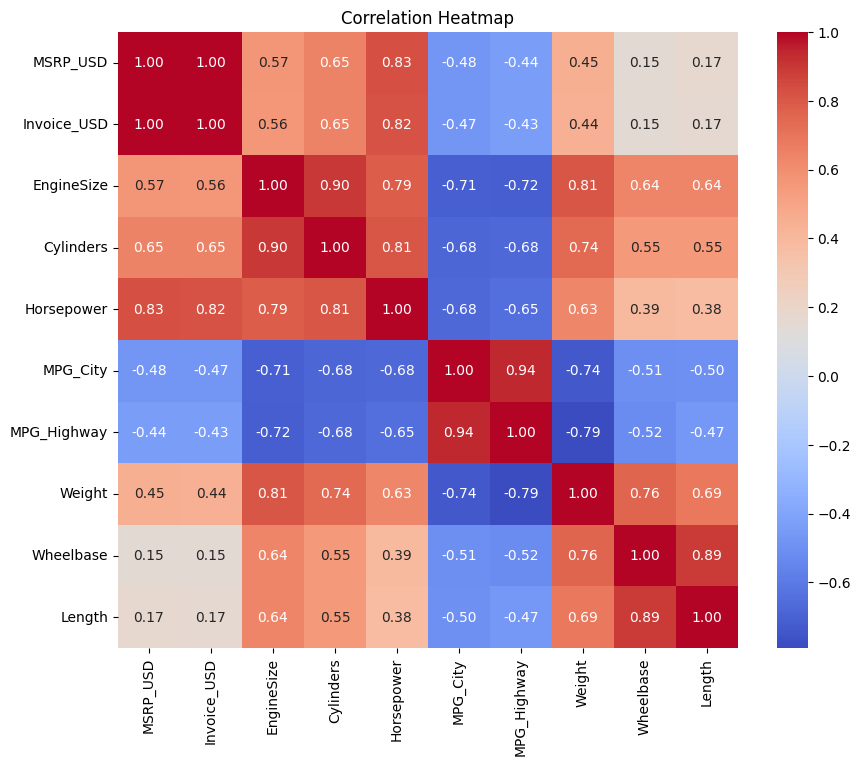

In [29]:
correlation_matrix = df[['MSRP_USD', 'Invoice_USD',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Type Distribution

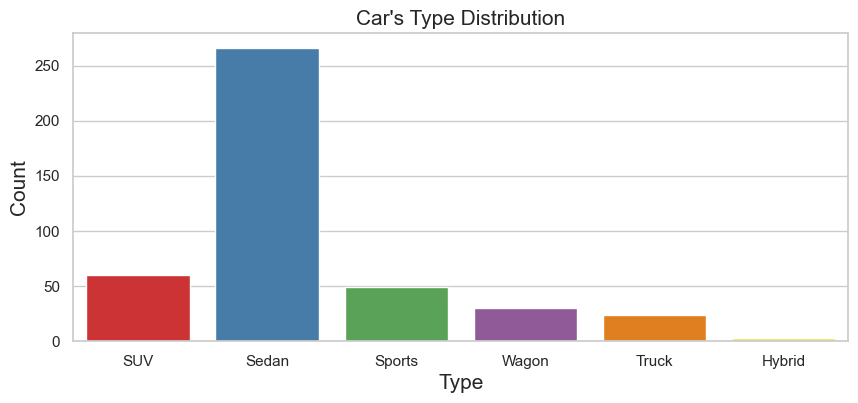

In [30]:
plt.figure(figsize = (10,4))
sns.set(style = 'whitegrid')
sns.countplot(x='Type', data = df, palette='Set1')
plt.title("Car's Type Distribution", fontsize = 15)
plt.xlabel('Type', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

___________________________________________________
___Pie Chart___

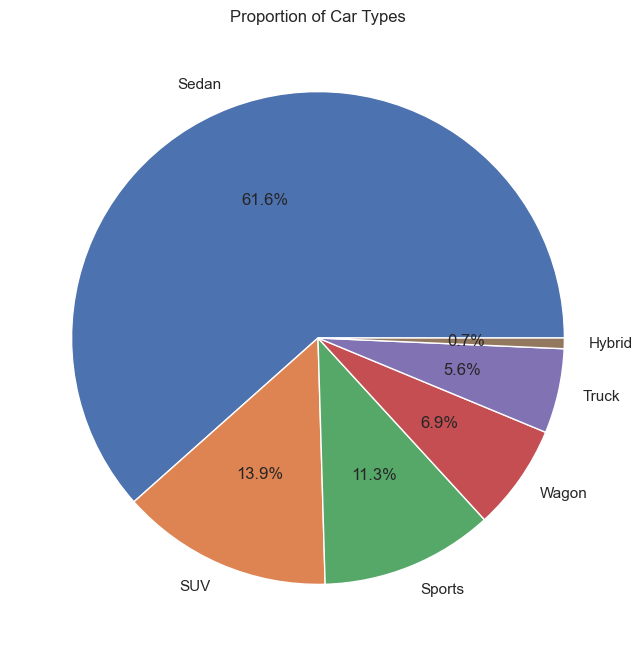

In [31]:
plt.figure(figsize=(8,8))
df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Car Types')
plt.ylabel('')
plt.show()

### Origin Distribution

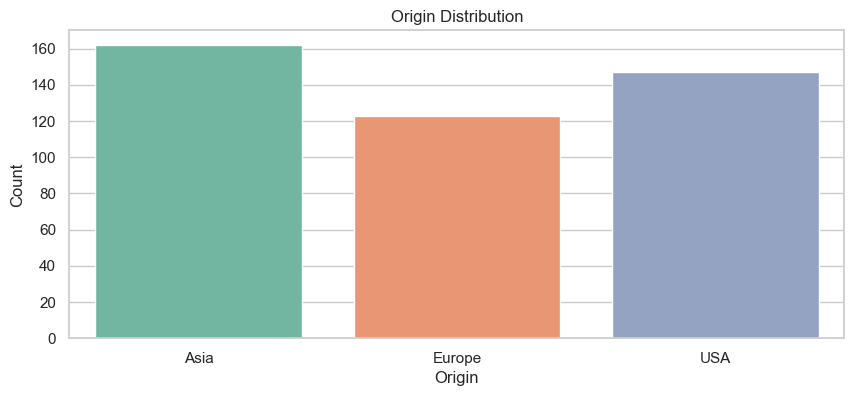

In [32]:
plt.figure(figsize = (10, 4))
sns.set(style = 'whitegrid')
sns.countplot(x = 'Origin', data = df, palette='Set2')
plt.title("Origin Distribution")
plt.ylabel("Count")
plt.xlabel('Origin')
plt.show()

### Distribution of engine size

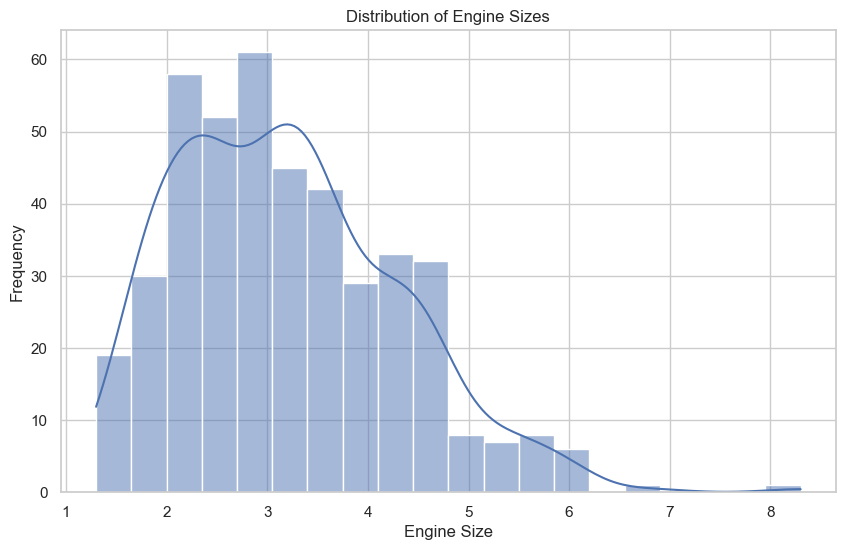

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='EngineSize', bins=20, kde=True)
plt.title('Distribution of Engine Sizes')
plt.xlabel('Engine Size')
plt.ylabel('Frequency')
plt.show()

### Distribution of horsepower by origin

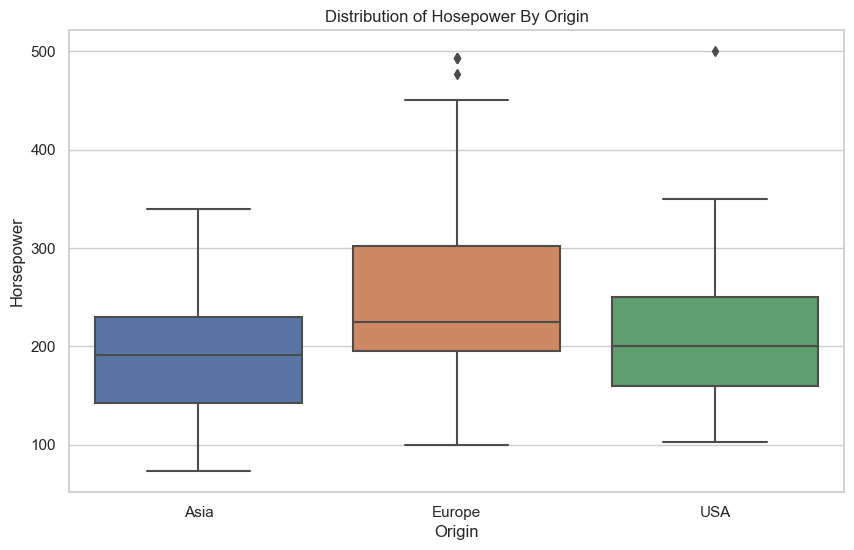

In [34]:
plt.figure(figsize = (10, 6))
sns.boxplot(x= 'Origin', y = 'Horsepower', data = df)
plt.title("Distribution of Hosepower By Origin")
plt.ylabel("Horsepower")
plt.xlabel("Origin")
plt.show()

### Relationship between MSRP_USD and Horsepower

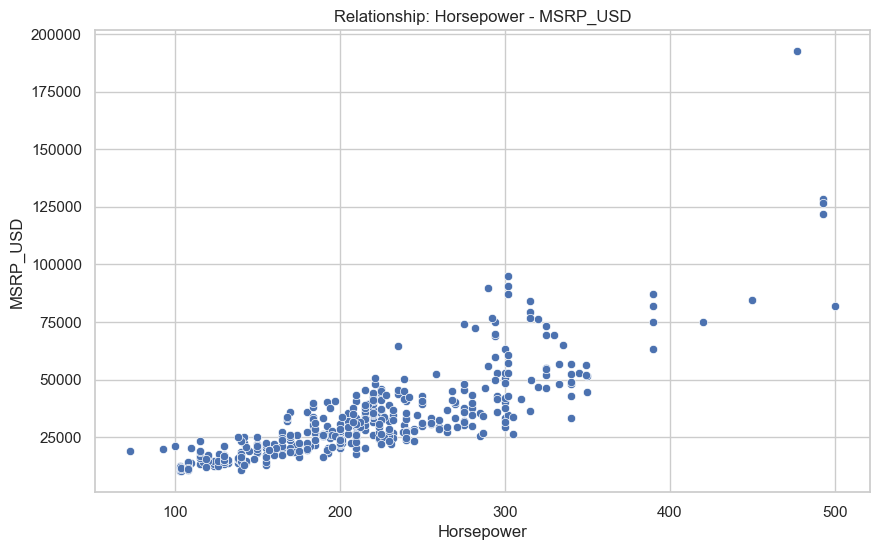

In [35]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Horsepower', y = 'MSRP_USD', data = df)
plt.title("Relationship: Horsepower - MSRP_USD")
plt.ylabel('MSRP_USD')
plt.xlabel("Horsepower")
plt.show()

### Distribution of invoice prices by origin

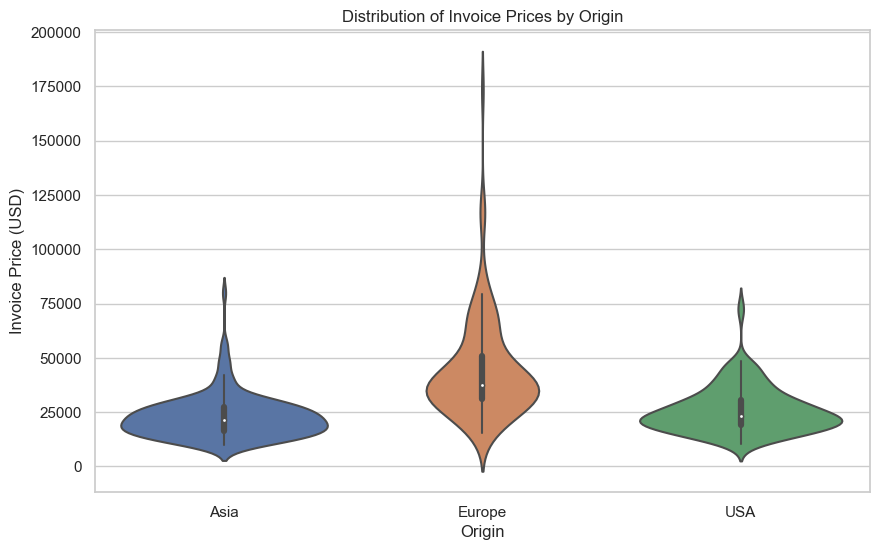

In [36]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Origin', y='Invoice_USD')
plt.title('Distribution of Invoice Prices by Origin')
plt.xlabel('Origin')
plt.ylabel('Invoice Price (USD)')
plt.show()

### Scatterplot Matrix 

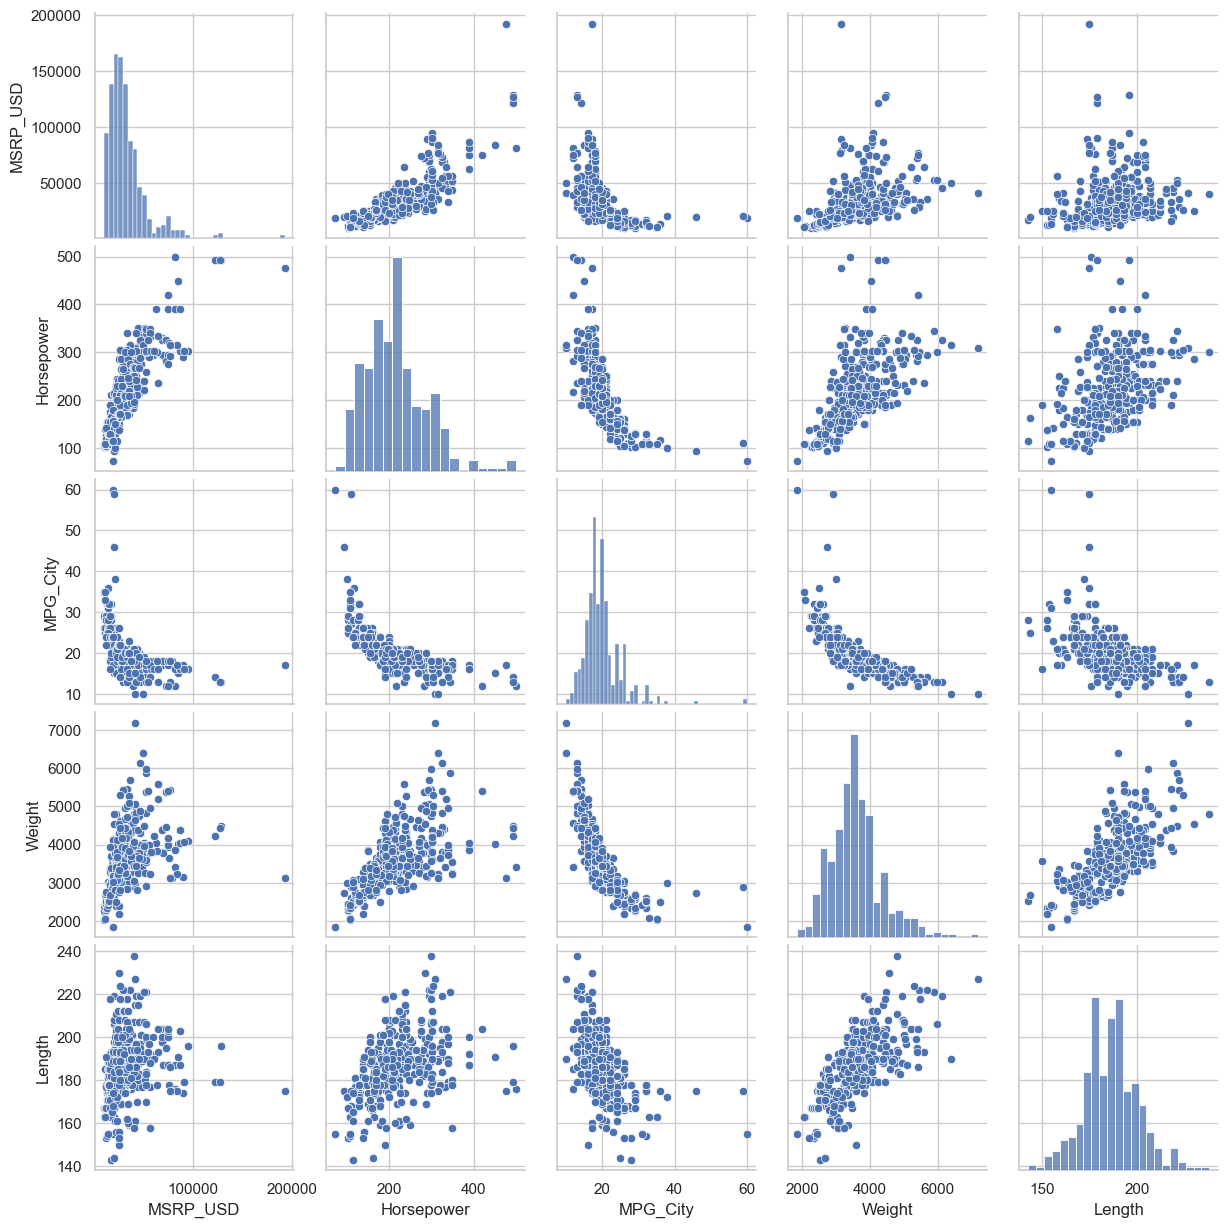

In [37]:
sns.pairplot(df[['MSRP_USD', 'Horsepower', 'MPG_City', 'Weight', 'Length']])
plt.show()

### Plotting Top 10 Cars based on Price 

In [38]:
top_10_price

,Make,Model,Type,Origin,DriveTrain,MSRP_USD,Invoice_USD,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
338,Porsche,911 GT2 2dr,Sports,Europe,Rear,192465.0,173560.0,3.6,6.0,477.0,17.0,24.0,3131.0,93.0,175.0
266,Mercedes-Benz,CL600 2dr,Sedan,Europe,Rear,128420.0,119600.0,5.5,12.0,493.0,13.0,19.0,4473.0,114.0,196.0
275,Mercedes-Benz,SL600 convertible 2dr,Sports,Europe,Rear,126670.0,117854.0,5.5,12.0,493.0,13.0,19.0,4429.0,101.0,179.0
274,Mercedes-Benz,SL55 AMG 2dr,Sports,Europe,Rear,121770.0,113388.0,5.5,8.0,493.0,14.0,21.0,4235.0,101.0,179.0
265,Mercedes-Benz,CL500 2dr,Sedan,Europe,Rear,94820.0,88324.0,5.0,8.0,302.0,16.0,24.0,4085.0,114.0,196.0
273,Mercedes-Benz,SL500 convertible 2dr,Sports,Europe,Rear,90520.0,84325.0,5.0,8.0,302.0,16.0,23.0,4065.0,101.0,179.0
6,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,89765.0,79978.0,3.2,6.0,290.0,17.0,24.0,3153.0,100.0,174.0
204,Jaguar,XKR convertible 2dr,Sports,Europe,Rear,86995.0,79226.0,4.2,8.0,390.0,16.0,23.0,4042.0,102.0,187.0
272,Mercedes-Benz,S500 4dr,Sedan,Europe,All,86970.0,80939.0,5.0,8.0,302.0,16.0,24.0,4390.0,122.0,203.0
20,Audi,RS 6 4dr,Sports,Europe,Front,84600.0,76417.0,4.2,8.0,450.0,15.0,22.0,4024.0,109.0,191.0


<Figure size 1600x1000 with 0 Axes>

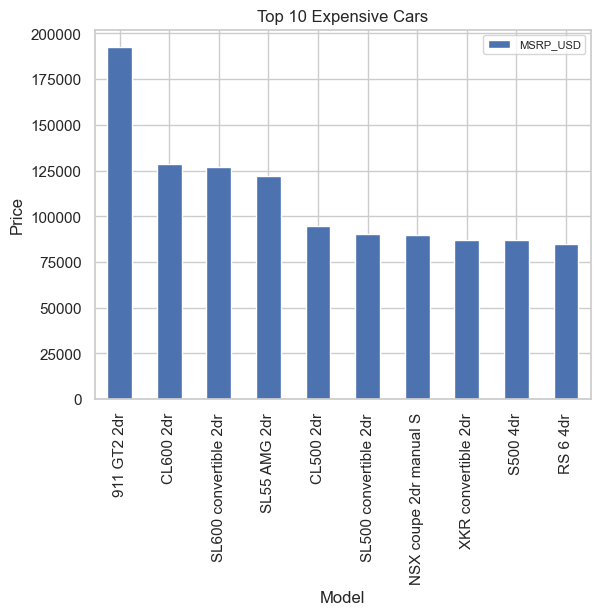

In [39]:
plt.figure(figsize = (16, 10))
top_10_price.plot(kind = 'bar', x='Model', y = 'MSRP_USD')
plt.title("Top 10 Expensive Cars")
plt.ylabel("Price")
plt.xlabel("Model")
plt.legend(fontsize = 8)
plt.show()

### Plotting Top 10 Cars based on Weight

In [40]:
top_10_heavy

,Make,Model,Type,Origin,DriveTrain,MSRP_USD,Invoice_USD,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
120,Ford,Excursion 6.8 XLT,SUV,USA,All,41475.0,36494.0,6.8,10.0,310.0,10.0,13.0,7190.0,137.0,227.0
169,Hummer,H2,SUV,USA,All,49995.0,45815.0,6.0,8.0,316.0,10.0,12.0,6400.0,123.0,190.0
145,GMC,Yukon XL 2500 SLT,SUV,USA,All,46265.0,40534.0,6.0,8.0,325.0,13.0,17.0,6133.0,130.0,219.0
233,Lincoln,Navigator Luxury,SUV,USA,All,52775.0,46360.0,5.4,8.0,300.0,13.0,18.0,5969.0,119.0,206.0
64,Cadillac,Escalade EXT,Truck,USA,All,52975.0,48541.0,6.0,8.0,345.0,13.0,17.0,5879.0,130.0,221.0
86,Chevrolet,Avalanche 1500,Truck,USA,All,36100.0,31689.0,5.3,8.0,295.0,14.0,18.0,5678.0,130.0,222.0
223,Lexus,LX 470,SUV,Asia,All,64800.0,56455.0,4.7,8.0,235.0,13.0,17.0,5590.0,112.0,193.0
139,Ford,F-150 Supercab Lariat,Truck,USA,All,33540.0,29405.0,5.4,8.0,300.0,14.0,18.0,5464.0,133.0,218.0
149,GMC,Sierra HD 2500,Truck,USA,All,29322.0,25759.0,6.0,8.0,300.0,13.0,18.0,5440.0,133.0,222.0
255,Mercedes-Benz,G500,SUV,Europe,All,76870.0,71540.0,5.0,8.0,292.0,13.0,14.0,5423.0,112.0,186.0


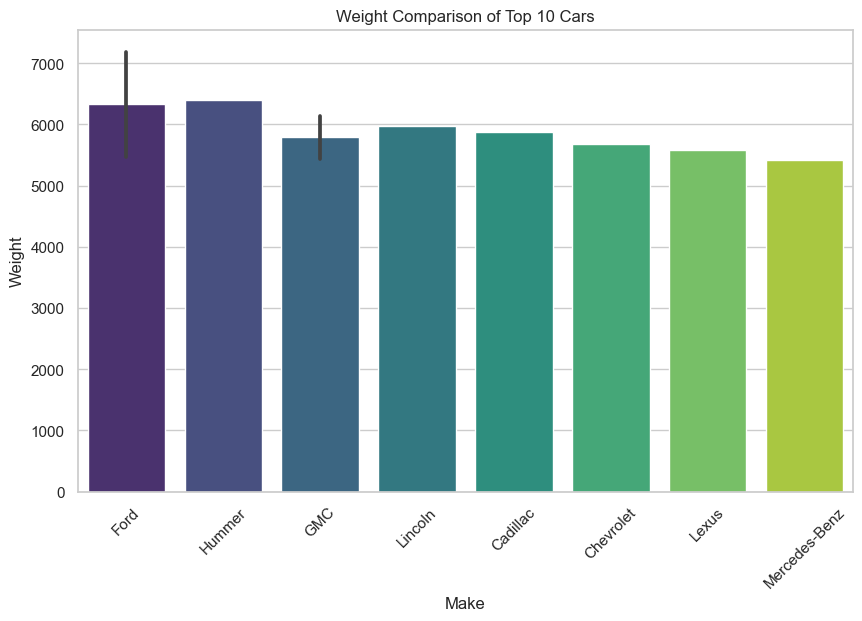

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_heavy, x='Make', y='Weight', palette='viridis')
plt.title('Weight Comparison of Top 10 Cars')
plt.xlabel('Make')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.show()

___________________________________________
___Wheelbase Comparison of Top 10 Cars___

<Figure size 1000x600 with 0 Axes>

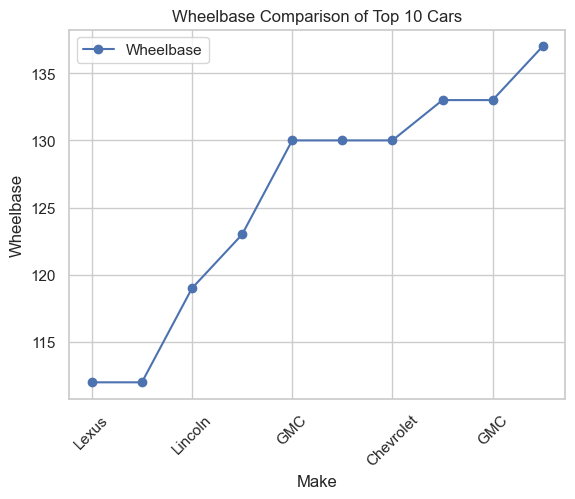

In [42]:
plt.figure(figsize=(10,6))
top_10_heavy.sort_values(by='Wheelbase', ascending=True).plot(x='Make', y='Wheelbase', kind='line', marker='o')
plt.title('Wheelbase Comparison of Top 10 Cars')
plt.xlabel('Make')
plt.ylabel('Wheelbase')
plt.xticks(rotation=45)
plt.show()

### Plotting Top 10 Cars based on Horsepower

In [43]:
top_10_hp

,Make,Model,Type,Origin,DriveTrain,MSRP_USD,Invoice_USD,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
116,Dodge,Viper SRT-10 convertible 2dr,Sports,USA,Rear,81795.0,74451.0,8.3,10.0,500.0,12.0,20.0,3410.0,99.0,176.0
266,Mercedes-Benz,CL600 2dr,Sedan,Europe,Rear,128420.0,119600.0,5.5,12.0,493.0,13.0,19.0,4473.0,114.0,196.0
274,Mercedes-Benz,SL55 AMG 2dr,Sports,Europe,Rear,121770.0,113388.0,5.5,8.0,493.0,14.0,21.0,4235.0,101.0,179.0
275,Mercedes-Benz,SL600 convertible 2dr,Sports,Europe,Rear,126670.0,117854.0,5.5,12.0,493.0,13.0,19.0,4429.0,101.0,179.0
338,Porsche,911 GT2 2dr,Sports,Europe,Rear,192465.0,173560.0,3.6,6.0,477.0,17.0,24.0,3131.0,93.0,175.0
20,Audi,RS 6 4dr,Sports,Europe,Front,84600.0,76417.0,4.2,8.0,450.0,15.0,22.0,4024.0,109.0,191.0
416,Volkswagen,Phaeton W12 4dr,Sedan,Europe,Front,75000.0,69130.0,6.0,12.0,420.0,12.0,19.0,5399.0,118.0,204.0
197,Jaguar,S-Type R 4dr,Sedan,Europe,Rear,63120.0,57499.0,4.2,8.0,390.0,17.0,24.0,4046.0,115.0,192.0
200,Jaguar,XJR 4dr,Sedan,Europe,Rear,74995.0,68306.0,4.2,8.0,390.0,17.0,24.0,3948.0,119.0,200.0
203,Jaguar,XKR coupe 2dr,Sports,Europe,Rear,81995.0,74676.0,4.2,8.0,390.0,16.0,23.0,3865.0,102.0,187.0


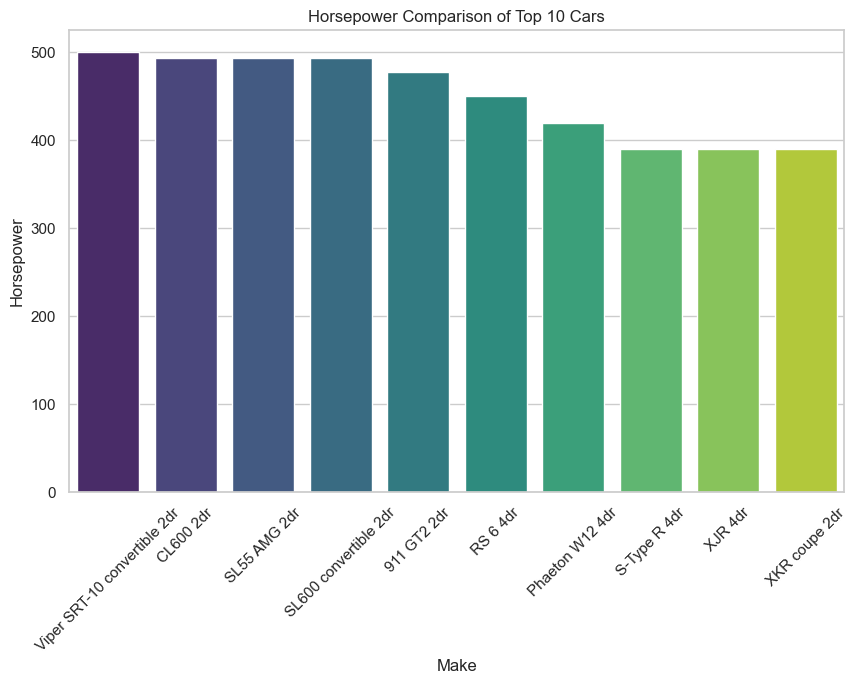

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_hp, x='Model', y='Horsepower', palette='viridis')
plt.title('Horsepower Comparison of Top 10 Cars')
plt.xlabel('Make')
plt.ylabel('Horsepower')
plt.xticks(rotation=45)
plt.show()